# Exploratory Data Analysis (EDA) on the Bank Account Fraud (BAF) dataset

This Jupyter notebook performs Exploratory Data Analysis (EDA) on one of the six synthetic tabular datasets in the Bank Account Fraud (BAF) suite of datasets. The BAF datasets were published at NeurIPS 2022 and are intended to provide a realistic, complete, and robust test bed to evaluate novel and existing methods in machine learning (ML) and fair ML.

## Dataset Information
The BAF suite of datasets comprises a total of 6 different synthetic bank account fraud tabular datasets. The datasets are realistic, based on a present-day real-world dataset for fraud detection, and each dataset has distinct controlled types of bias. Additionally, the datasets have an imbalanced setting with an extremely low prevalence of positive class, contain temporal data and observed distribution shifts, and have privacy-preserving features to protect the identity of potential applicants.

In this notebook, we will be exploring one of the datasets in the BAF suite, the Base.csv dataset.

## Loading and describing the dataset
We start by loading the dataset into a Pandas DataFrame and displaying its first few rows using the head() function. We then display some basic statistics of the dataset using the describe() function.

In [13]:
import pandas as pd

# Read in the data
df = pd.read_csv('../dataset/Base.csv', header=0)
df.head()

/tmp/ipykernel_24715/2112200166.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset/Base.csv', header=0)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [14]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


## Boxplot
We then use the Seaborn library to create boxplots of the numerical columns in the dataset. Boxplots are used to visualize the distribution and outliers of each numerical column.

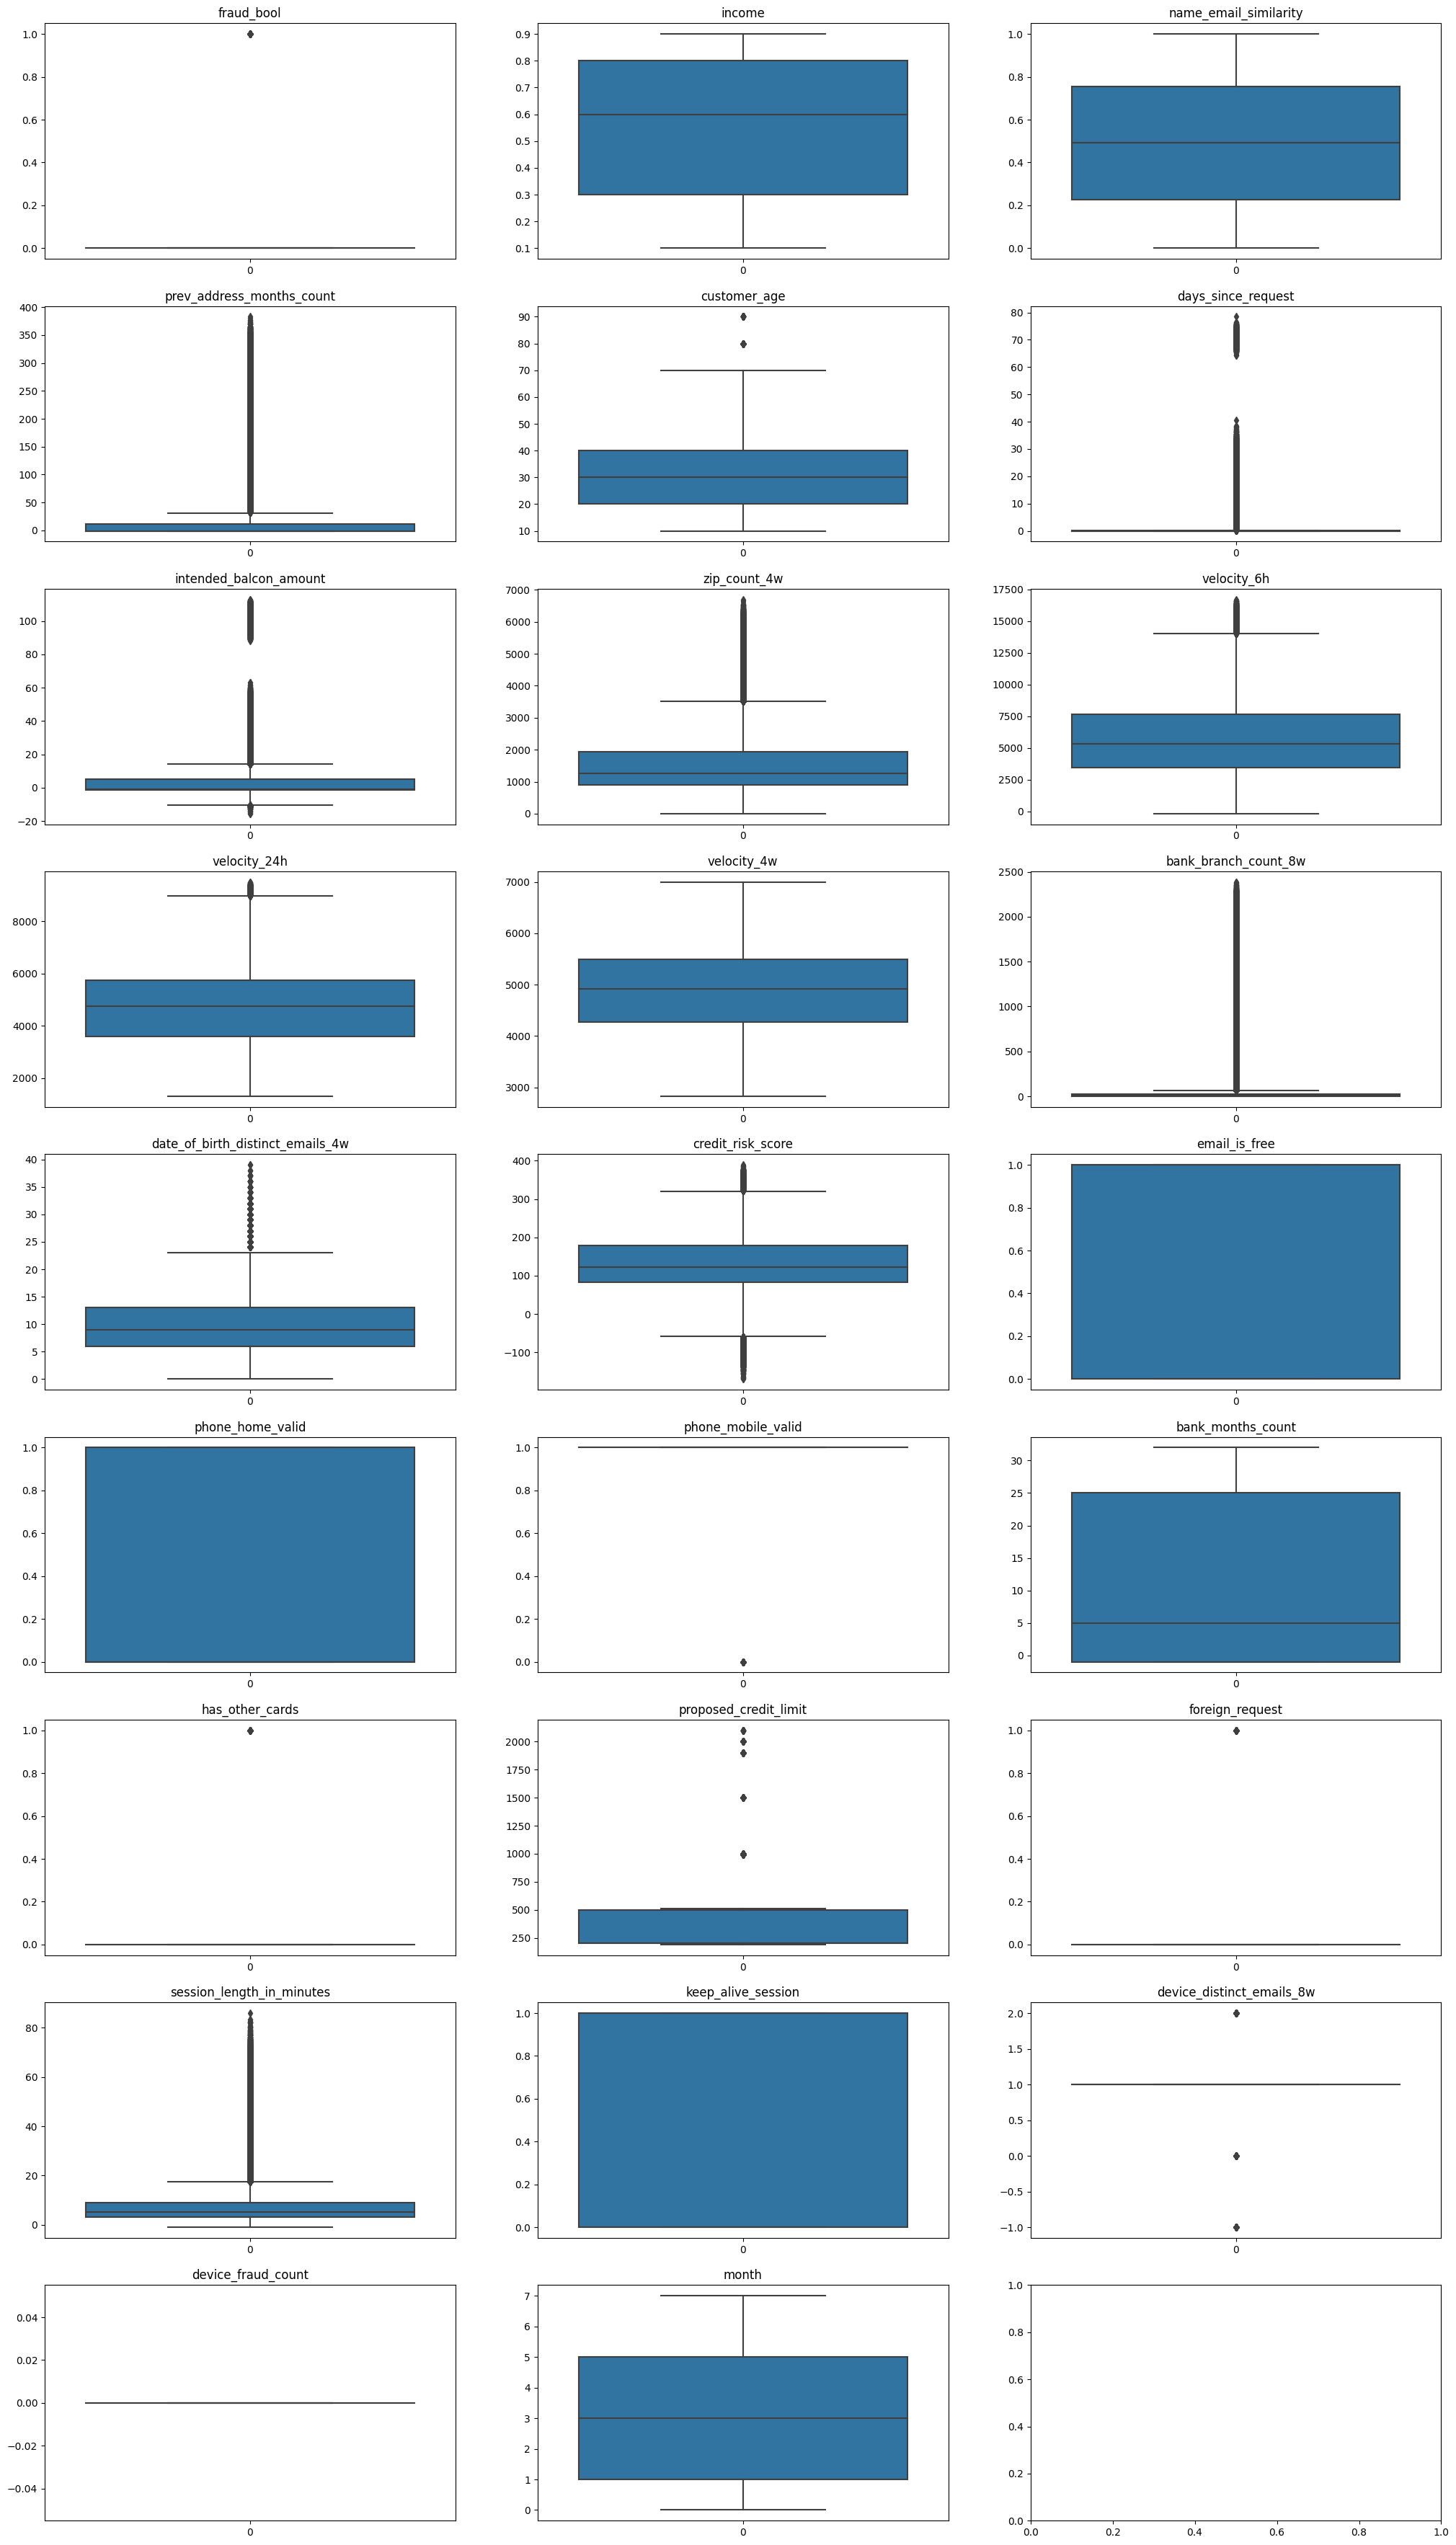

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# get the list of numerical columns
num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()

# create a grid of subplots using seaborn
n_cols = 3  # number of columns in the grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # number of rows in the grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 5*n_rows))

# loop through the columns and create a boxplot for each one
for i, col in enumerate(num_cols):
    row_idx = i // n_cols  # row index for this subplot
    col_idx = i % n_cols  # column index for this subplot
    ax = sns.boxplot(data=df[col], ax=axes[row_idx, col_idx])
    ax.set_title(col)

## Analyzing Outliers
Outliers can take many different forms in a dataset. In some cases, outliers may be extreme values that fall far outside the expected range of the data, while in other cases, outliers may appear as discontinuities or gaps in the data. In this particular dataset, it has been observed that there are some columns - customer_age, days_since_request, intended_balcon_amount, and proposed_credit_limit - that contain discontinuous points. These points may represent missing data or errors in data collection, or they may be indicative of some other pattern in the data. In the next section, we will explore these columns in more detail and investigate the potential causes and implications of these discontinuous points.

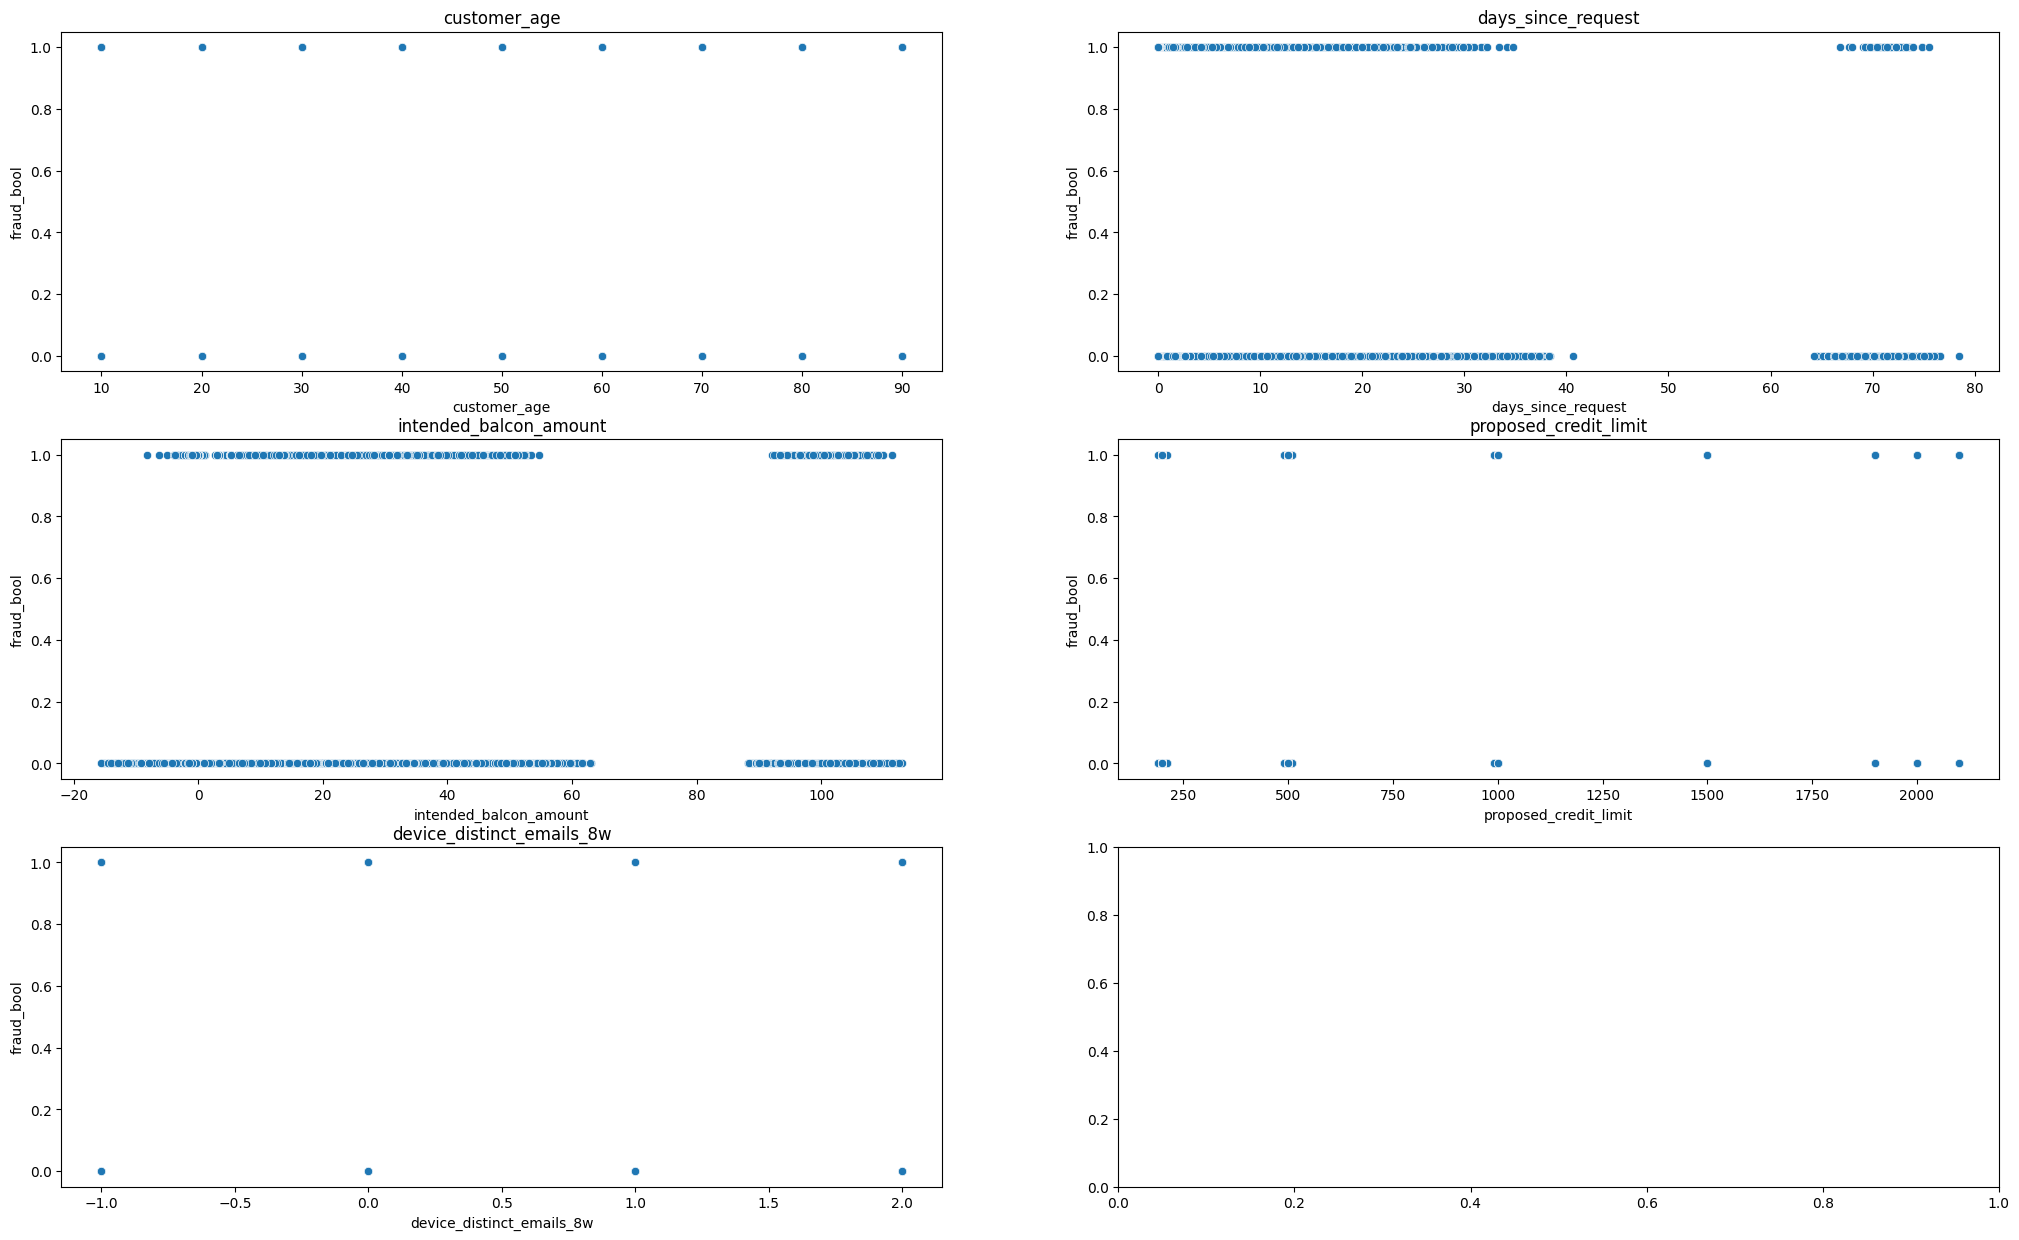

In [16]:
label_column = 'fraud_bool'
columns_to_analyze = ['customer_age', 'days_since_request', 'intended_balcon_amount', 'proposed_credit_limit', 'device_distinct_emails_8w']

# create a grid of subplots using seaborn
n_cols = 2  # number of columns in the grid
n_rows = (len(columns_to_analyze) + n_cols - 1) // n_cols  # number of rows in the grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 5*n_rows))

# loop through the columns and create a boxplot for each one
for i, col in enumerate(columns_to_analyze):
    row_idx = i // n_cols  # row index for this subplot
    col_idx = i % n_cols  # column index for this subplot
    ax = sns.scatterplot(x=col, y=label_column, data=df, ax=axes[row_idx, col_idx])
    ax.set_title(col)

Based on our analysis, it appears that there are no significant differences in the values of the variables investigated between the fraud and non-fraud categories. This suggests that outliers in these variables are not particularly informative or indicative of fraud, and may simply be due to random variations or noise in the data.

Given this result, it may not be necessary to remove outliers from these variables in order to improve the accuracy of your analysis or model.

In [17]:
# Determine the upper and lower bounds for outliers
#num_cols = df.select_dtypes(include=['float']).columns.tolist()


# loop through the columns and remove the outliers
#for i, col in enumerate(num_cols):
#    Q1 = df[col].quantile(0.25)
#    Q3 = df[col].quantile(0.75)
#    IQR = Q3 - Q1
#    lower_bound = Q1 - (1.5 * IQR)
#    upper_bound = Q3 + (1.5 * IQR)
#    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [18]:
#df.describe()

In [19]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#import os

# get the list of numerical columns
#num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()

# create a grid of subplots using seaborn
#n_cols = 3  # number of columns in the grid
#n_rows = (len(num_cols) + n_cols - 1) // n_cols  # number of rows in the grid
#fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 5*n_rows))

# loop through the columns and create a boxplot for each one
#for i, col in enumerate(num_cols):
#    row_idx = i // n_cols  # row index for this subplot
#    col_idx = i % n_cols  # column index for this subplot
#    ax = sns.boxplot(data=df[col], ax=axes[row_idx, col_idx])
#    ax.set_title(col)

## Correlation Matrix
We can calculate the correlation matrix between the numerical features in the dataset to see how they are related to each other. This can give us some insight into which features are most important for predicting fraud.

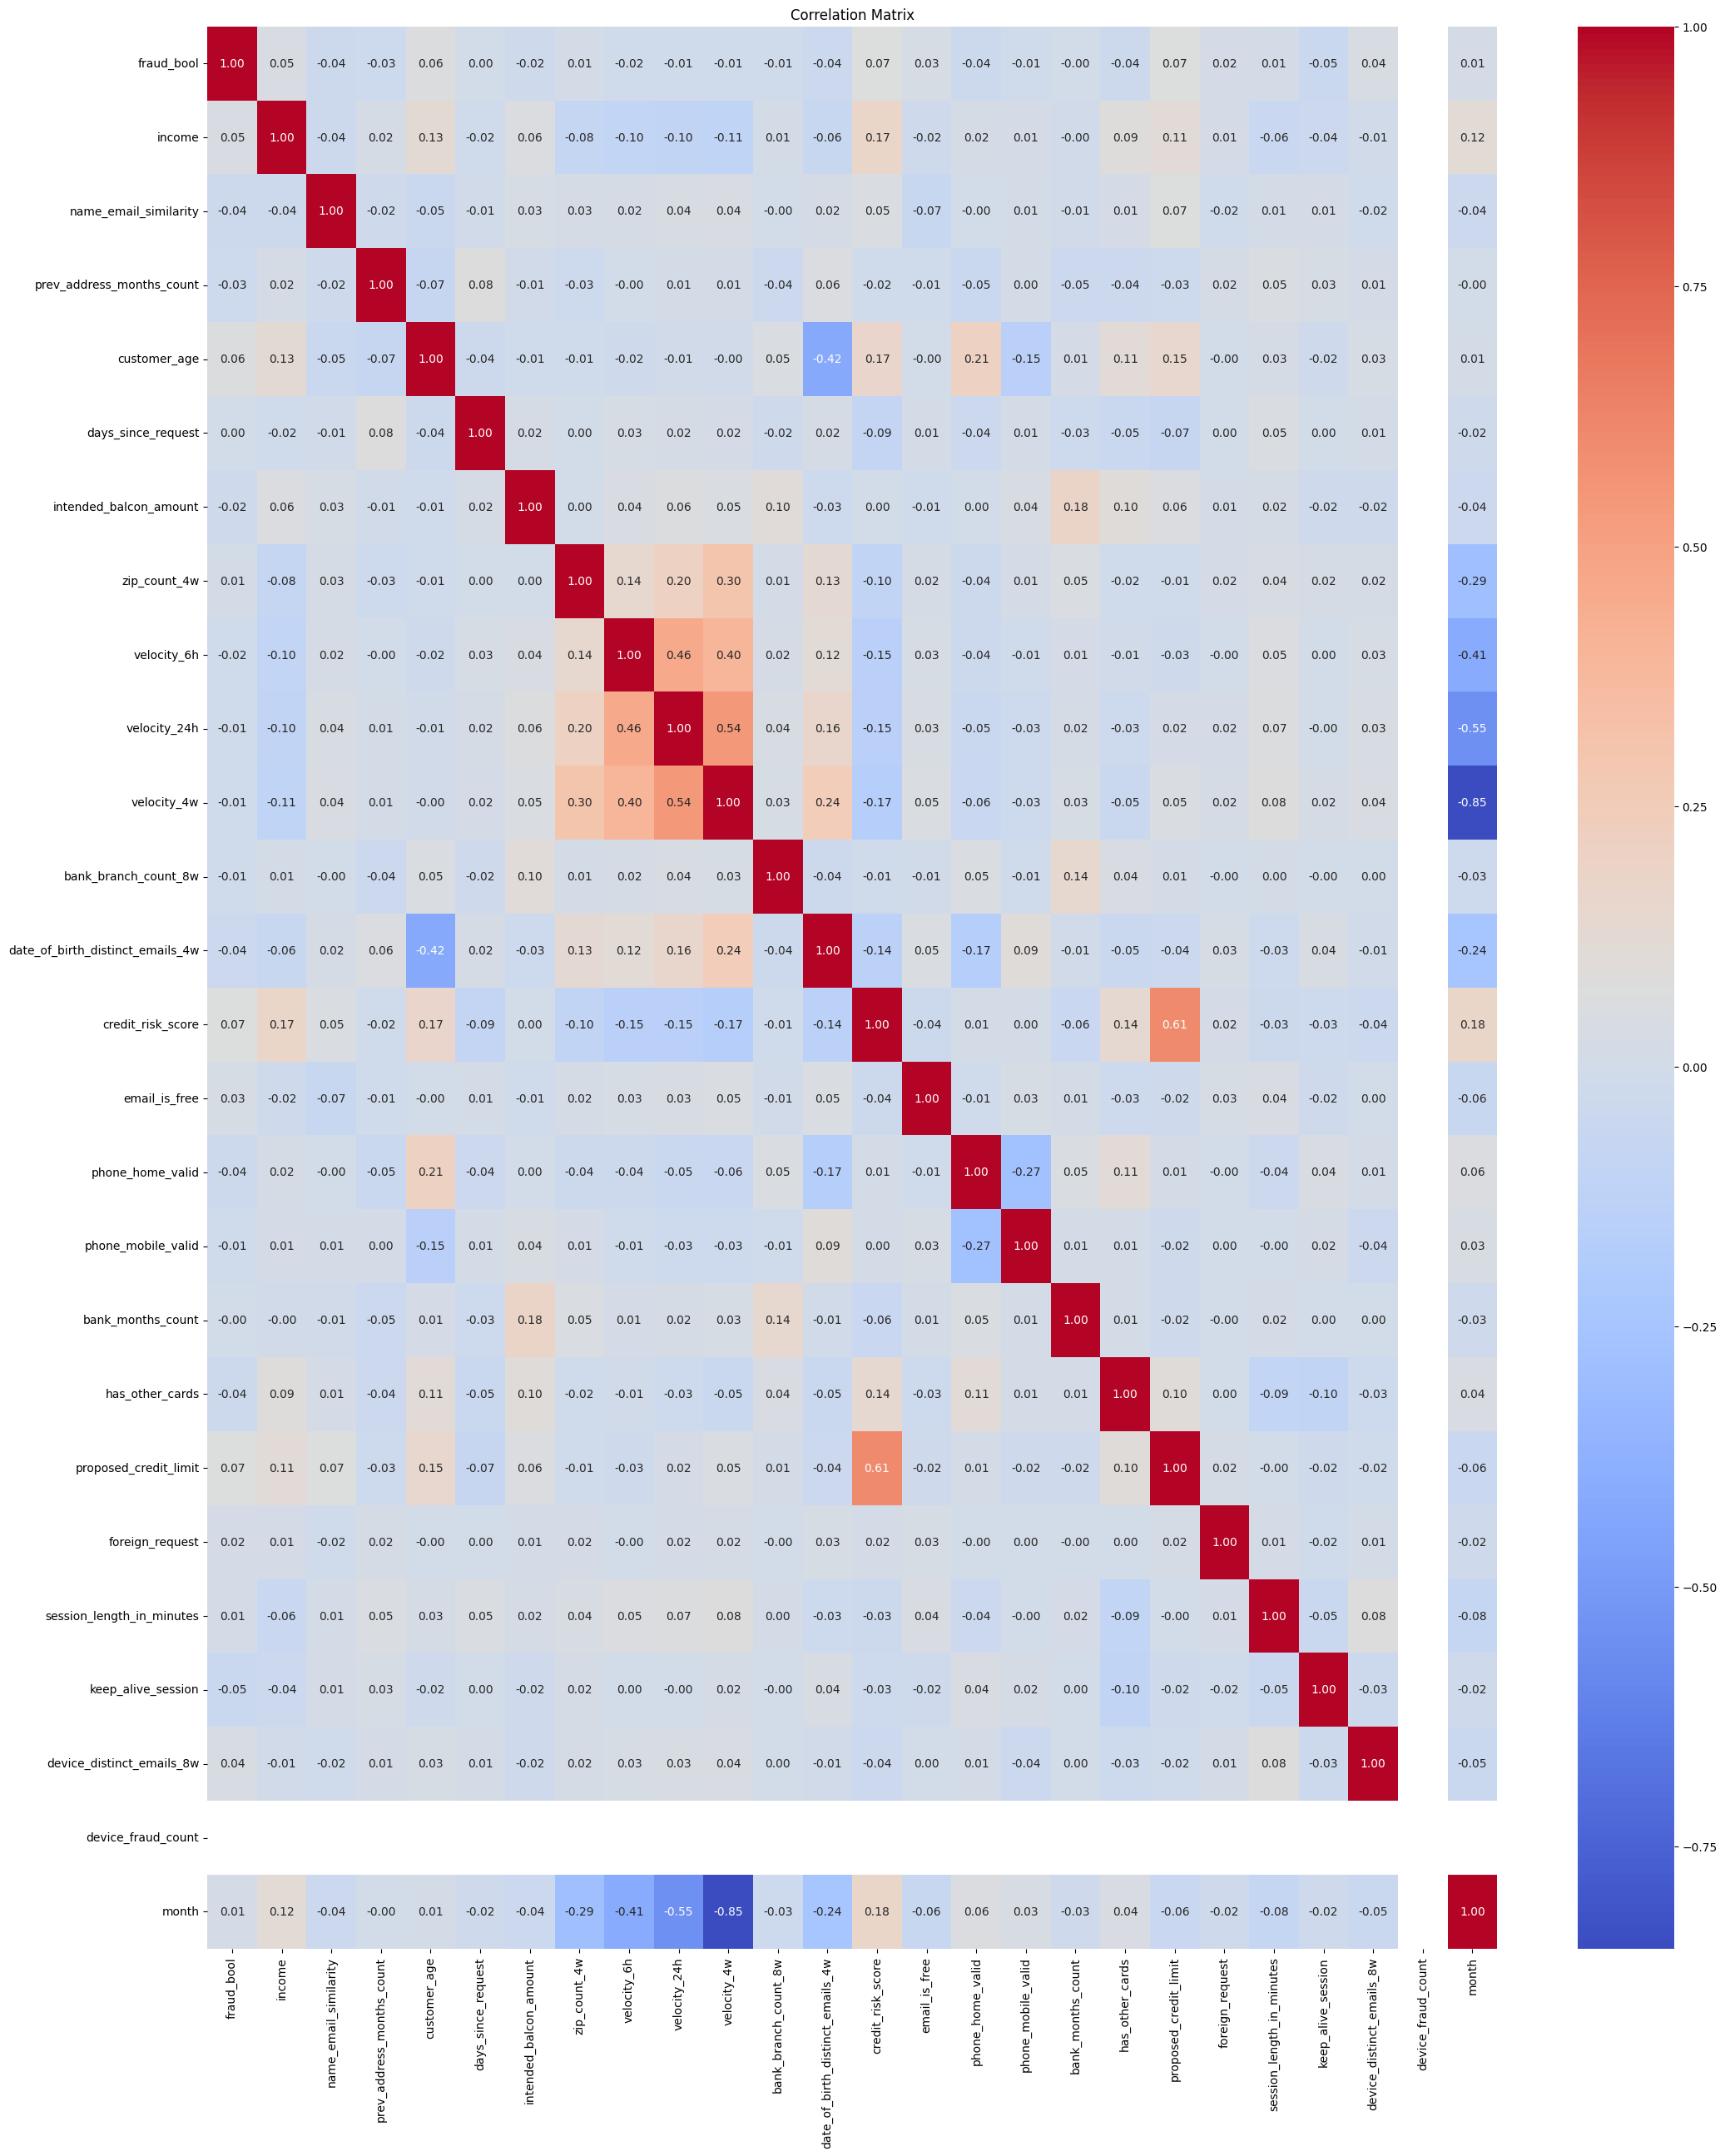

In [20]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['float', 'int']).corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(25, 30))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()

## Histograms
We can also create histograms of the numerical columns to see the distribution of each feature. This can help us identify any features that may need to be transformed to achieve a normal distribution.

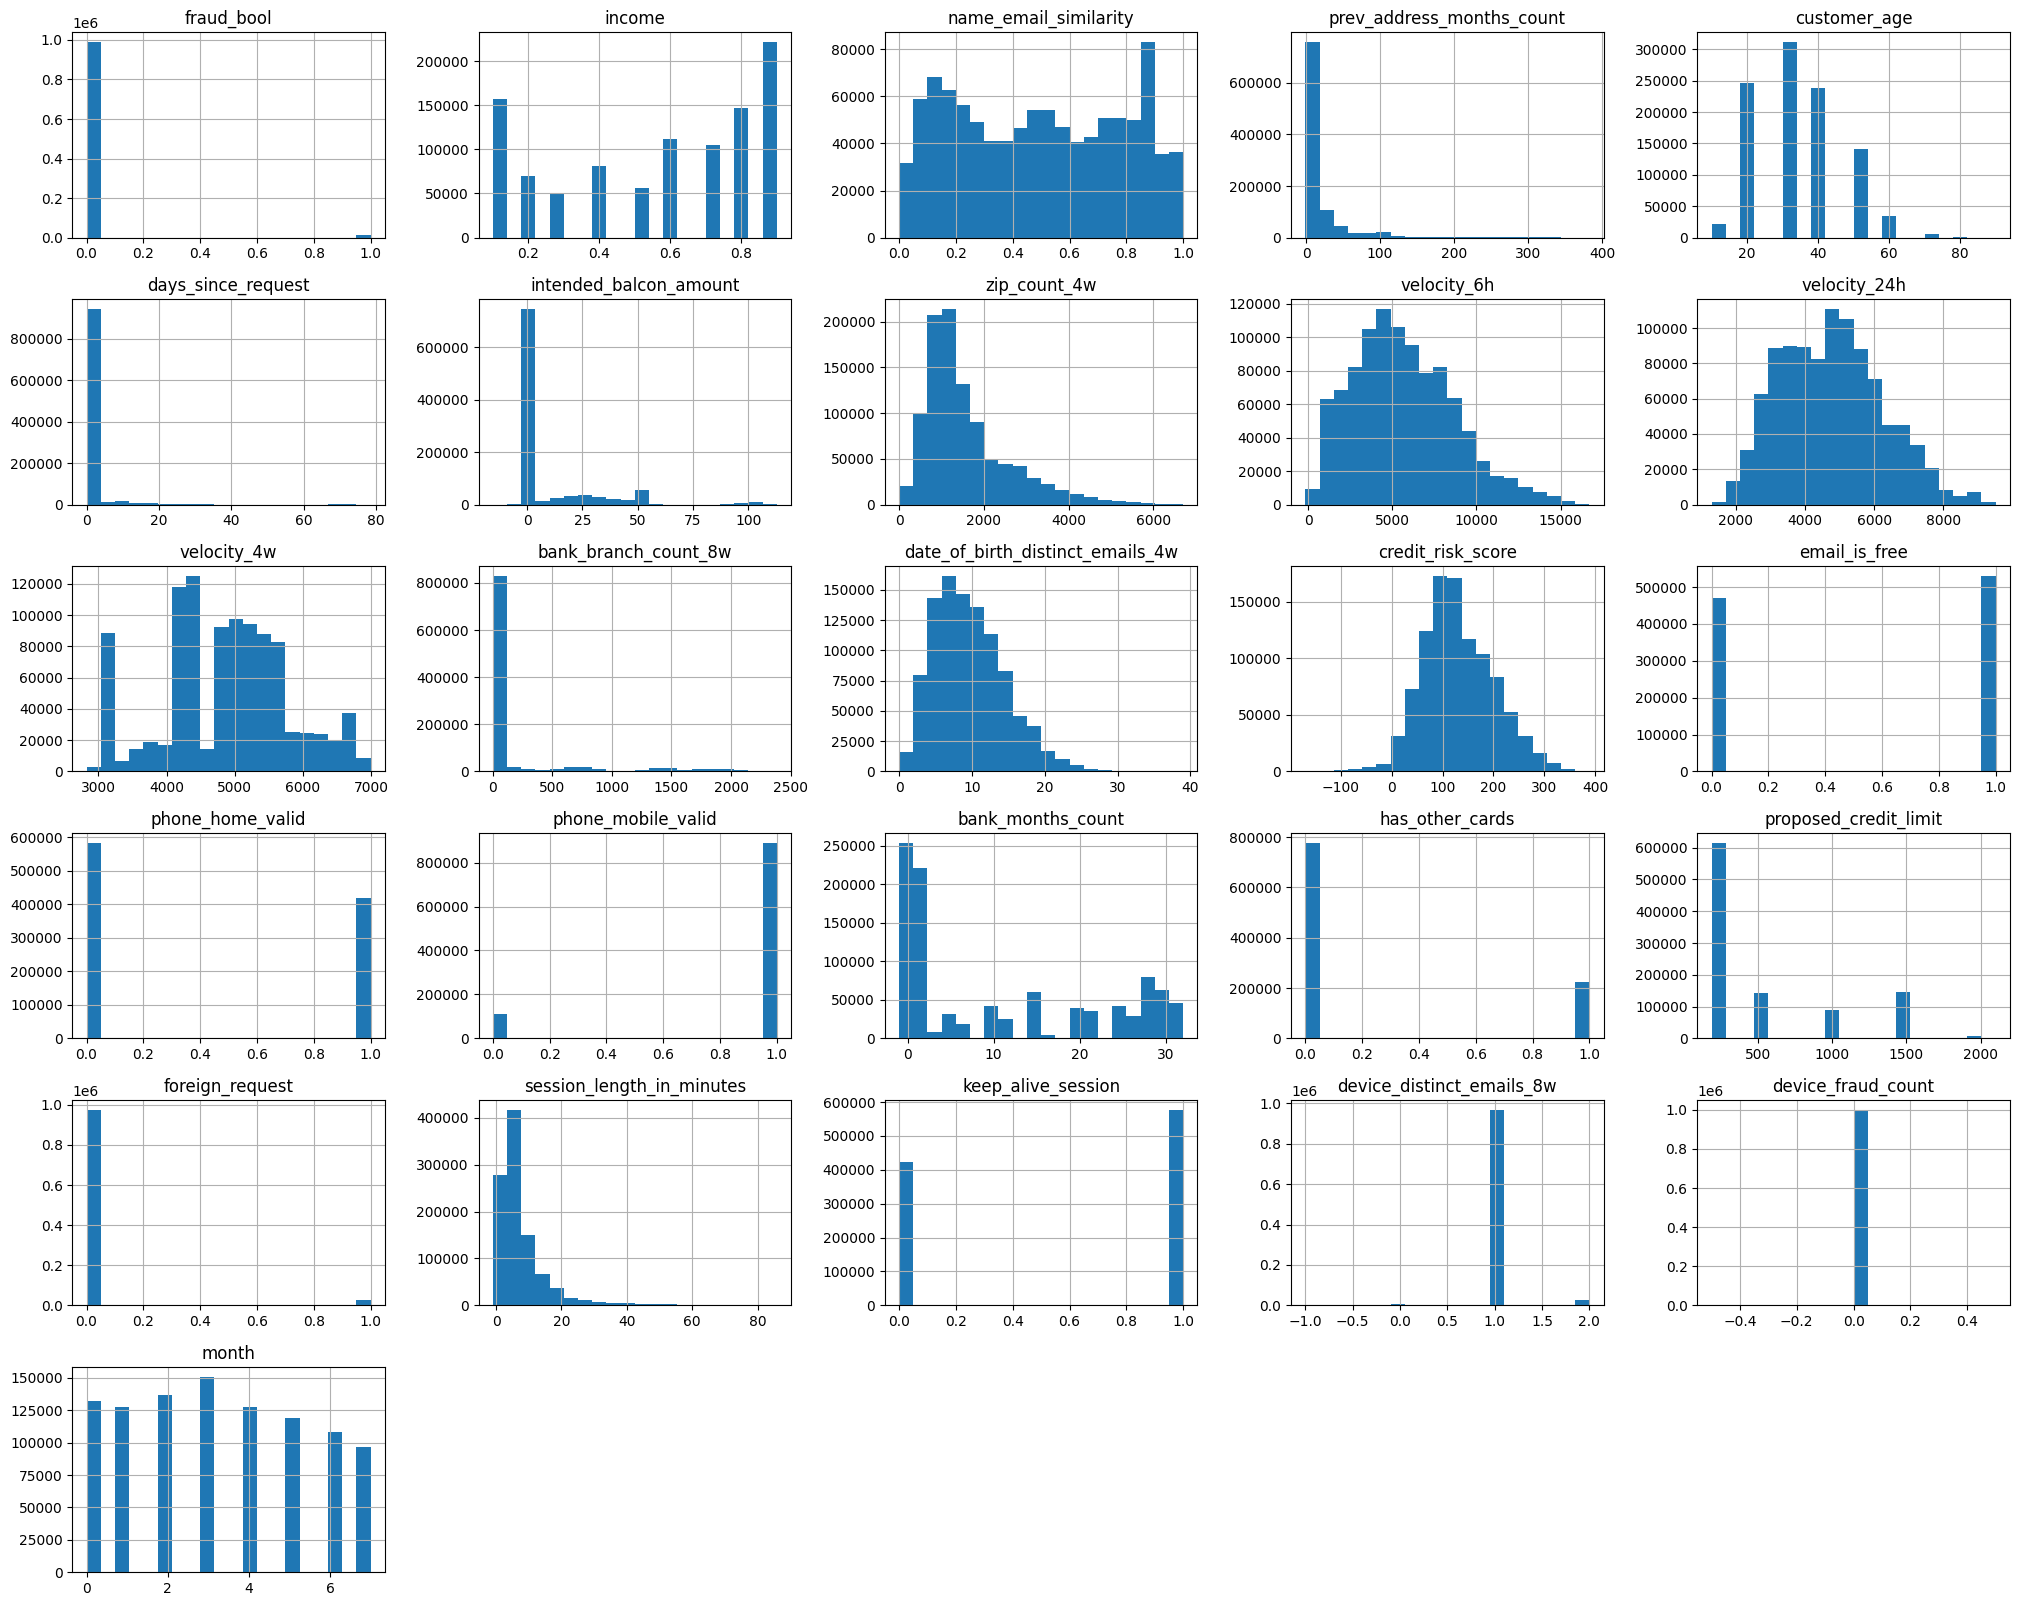

In [21]:
# Create histograms of the numerical columns
df.hist(bins=20, figsize=(25, 20))
plt.show()

## Count Plot
Finally, we can create a count plot to visualize the distribution of the target variable (fraud). This can help us identify the class imbalance in the dataset.

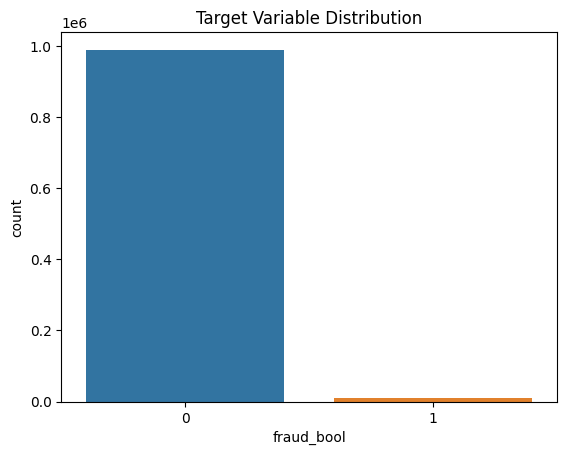

In [22]:
# Create a count plot of the target variable
sns.countplot(x='fraud_bool', data=df)
plt.title('Target Variable Distribution')
plt.show()
